# Navigation

This notebook contains the solution to the navigation problem in the udacity deep reinforcement learning program. 

# 1. Importing dependencies and starting the environment

We will start by importing the required dependencies for this project, this project contains two python classes, one for the model and one of the RL agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque

from plot import Plot, PlotSingle

Next we will load the unity environment and get the default brain

In [2]:
def reset_env():
    env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.app")
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=True)[brain_name]
    state_size = len(env_info.vector_observations[0])
    num_actions = brain.vector_action_space_size
    return env, env_info, state_size, num_actions, brain_name

env, env_info, state_size, num_actions, brain_name = reset_env()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 


In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
print('Number of actions:', num_actions)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.16895212 0.
 1.         0.         0.         0.20073597 1.         0.
 0.         0.         0.12865657 0.         1.         0.
 0.         0.14938059 1.         0.         0.         0.
 0.58185619 0.         1.         0.         0.         0.16089135
 0.         1.         0.         0.         0.31775284 0.
 0.        ]
States have length: 37


### 3. Create the train dqn agent 

In [4]:
import torch
def dqn(agent, agent_type, env, brain_name, num_episodes=4000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, testing=False):
    
    eps=eps_start
    score = 0
    score_window = deque(maxlen=100)
    scores = []
    
    for i_episode in range(1, num_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps).astype(int)
            
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
            if not testing:
                agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
                
        score_window.append(score)
        scores.append(score)
            
        eps = max(eps_end, eps_decay*eps)
            
        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(score_window)), end="")
            
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(score_window)))
        
        if np.mean(score_window)>=13.0 and not testing:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(score_window)))
            torch.save(agent.qnet_local.state_dict(), './saved_models/' + agent_type)
            break
        if not testing:    
            torch.save(agent.qnet_local.state_dict(), './saved_models/' + agent_type)
    
    return scores

QNet(
  (h1): Linear(in_features=37, out_features=20, bias=True)
  (h2): Linear(in_features=20, out_features=15, bias=True)
  (out): Linear(in_features=15, out_features=4, bias=True)
)
Training Vanilla DQN
Episode 100	Average Score: 0.65
Episode 200	Average Score: 4.48
Episode 300	Average Score: 6.43
Episode 400	Average Score: 8.38
Episode 500	Average Score: 11.95

Environment solved in 447 episodes!	Average Score: 13.01


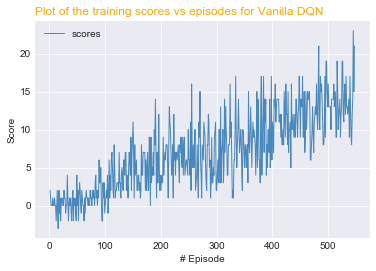

In [5]:
from agent import Agent

vanilla_dqn = Agent(state_size,  num_actions, use_double_q=False, use_dueling_net=False)

# Train the agent
print("Training Vanilla DQN")
env.reset(train_mode=True)[brain_name]
scores = dqn(vanilla_dqn,"Vanilla",  env, brain_name)

plt = PlotSingle(scores, "Vanilla DQN")
plt.make_plot()


QNet(
  (h1): Linear(in_features=37, out_features=20, bias=True)
  (h2): Linear(in_features=20, out_features=15, bias=True)
  (out): Linear(in_features=15, out_features=4, bias=True)
)
Training Double DQN
Episode 100	Average Score: 0.57
Episode 200	Average Score: 3.69
Episode 300	Average Score: 6.28
Episode 400	Average Score: 7.29
Episode 500	Average Score: 11.29

Environment solved in 448 episodes!	Average Score: 13.01


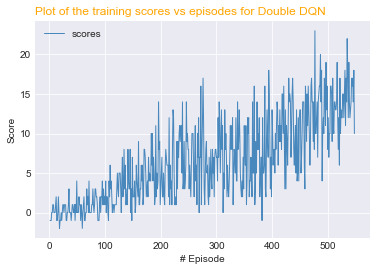

In [6]:
from agent import Agent

Double_DQN = Agent(state_size,  num_actions, use_double_q=True, use_dueling_net=False)

# Train the agent
print("Training Double DQN")
env.reset(train_mode=True)[brain_name]
scores = dqn(Double_DQN,"Double_DQN",  env, brain_name)

plt = PlotSingle(scores, "Double DQN")
plt.make_plot()


Dueling_DQN(
  (h1): Linear(in_features=37, out_features=20, bias=True)
  (h2): Linear(in_features=20, out_features=15, bias=True)
  (adv): Linear(in_features=15, out_features=15, bias=True)
  (val): Linear(in_features=15, out_features=15, bias=True)
  (adv2): Linear(in_features=15, out_features=4, bias=True)
  (val2): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
)
Training Dueling DQN
Episode 100	Average Score: 0.74
Episode 200	Average Score: 3.57
Episode 300	Average Score: 5.83
Episode 400	Average Score: 8.27
Episode 500	Average Score: 10.92

Environment solved in 488 episodes!	Average Score: 13.17


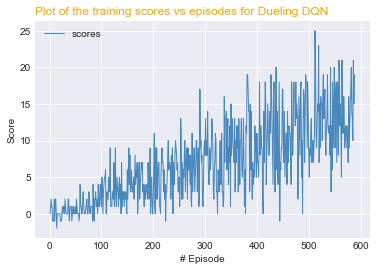

In [9]:
from agent import Agent

Dueling_DQN = Agent(state_size,  num_actions, use_double_q=False, use_dueling_net=True)

# Train the agent
print("Training Dueling DQN")
env.reset(train_mode=True)[brain_name]
scores = dqn(Dueling_DQN,"Dueling_DQN",  env, brain_name)

plt = PlotSingle(scores, "Dueling DQN")
plt.make_plot()


Dueling_DQN(
  (h1): Linear(in_features=37, out_features=20, bias=True)
  (h2): Linear(in_features=20, out_features=15, bias=True)
  (adv): Linear(in_features=15, out_features=15, bias=True)
  (val): Linear(in_features=15, out_features=15, bias=True)
  (adv2): Linear(in_features=15, out_features=4, bias=True)
  (val2): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
)
Training Dueling Double DQN
Episode 100	Average Score: 0.68
Episode 200	Average Score: 2.96
Episode 300	Average Score: 5.07
Episode 400	Average Score: 7.06
Episode 500	Average Score: 10.80

Environment solved in 496 episodes!	Average Score: 13.00


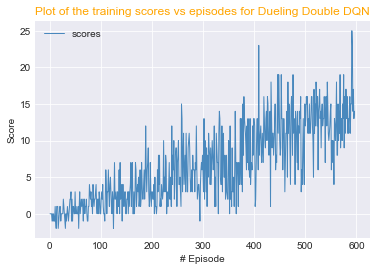

In [8]:
from agent import Agent

Dueling_Double_DQN = Agent(state_size,  num_actions, use_double_q=True, use_dueling_net=True)

# Train the agent
print("Training Dueling Double DQN")
env.reset(train_mode=True)[brain_name]
scores = dqn(Dueling_Double_DQN,"Dueling_Double_DQN",  env, brain_name)

plt = PlotSingle(scores, "Dueling Double DQN")
plt.make_plot()


### Testing a saved model

In [ ]:
from agent import Agent

vanilla_dqn = Agent(state_size,  num_actions, use_double_q=False, use_dueling_net=False, testing=True)

# Train the agent
print("Testing Vanilla DQN")
env.reset(train_mode=False)[brain_name]
scores = dqn(vanilla_dqn,"Vanilla",  env, brain_name, testing=True)


QNet(
  (h1): Linear(in_features=37, out_features=20, bias=True)
  (h2): Linear(in_features=20, out_features=15, bias=True)
  (out): Linear(in_features=15, out_features=4, bias=True)
)
Testing Vanilla DQN


In [ ]:
from agent import Agent

double_dqn = Agent(state_size,  num_actions, use_double_q=True, use_dueling_net=False, testing=True, save_weights_path='./saved_weights/Double_DQN')

# Train the agent
print("Testing Double DQN")
env.reset(train_mode=False)[brain_name]
scores = dqn(double_dqn,"Double DQN",  env, brain_name, testing=True)

In [ ]:
from agent import Agent

dueling_dqn = Agent(state_size,  num_actions, use_double_q=False, use_dueling_net=True, testing=True, save_weights_path='./saved_weights/Dueling_DQN')

# Train the agent
print("Testing Dueling DQN")
env.reset(train_mode=False)[brain_name]
scores = dqn(dueling_dqn,"Vanilla",  env, brain_name, testing=True)

In [ ]:
from agent import Agent

double_dueling_dqn = Agent(state_size,  num_actions, use_double_q=True, use_dueling_net=True, testing=True, save_weights_path='./saved_weights/Dueling_Double_DQN')

# Train the agent
print("Testing Double Dueling DQN")
env.reset(train_mode=False)[brain_name]
scores = dqn(double_dueling_dqn,"Double Dueling",  env, brain_name, testing=True)